Script 2-1: creating an igraph network from spatial data files

In [1]:
#import packages
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os

In [2]:
#import Burkina Faso market millet prices from the csv file
File="/Users/franckm/Documents/draftcodefiles/BF_Millet.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
mydata=pd.read_csv(os.path.basename(File),encoding='latin1')

In [3]:
#import weight matrix of Burkina Faso markets
File="/Users/franckm/Documents/draftcodefiles/weights_bk.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
weights=pd.read_csv(os.path.basename(File),encoding='latin1')

In [4]:
#define the metric between markets and construct the local Moran statistic
#here, correlation coefficient
data=mydata.iloc[:,1:46]
weights_total=weights.iloc[:,1:46]
cor=np.corrcoef(data.transpose())
cor[cor>0]=1
cor_weighted=np.multiply(cor,weights_total)

In [5]:
#creat market graph and get rid of loops created from the correlation
bf_market_w=Graph.Adjacency(cor_weighted,mode="undirected")
edge_list=bf_market_w.get_edgelist()
self_loop=[]
for i in range(0,46):
    self=(i,i)
    self_loop.append(self)
to_remove=[]
for i in edge_list:
    for j in self_loop:
        if i==j:
            to_remove.append(i)
bf_market_w.delete_edges(to_remove)

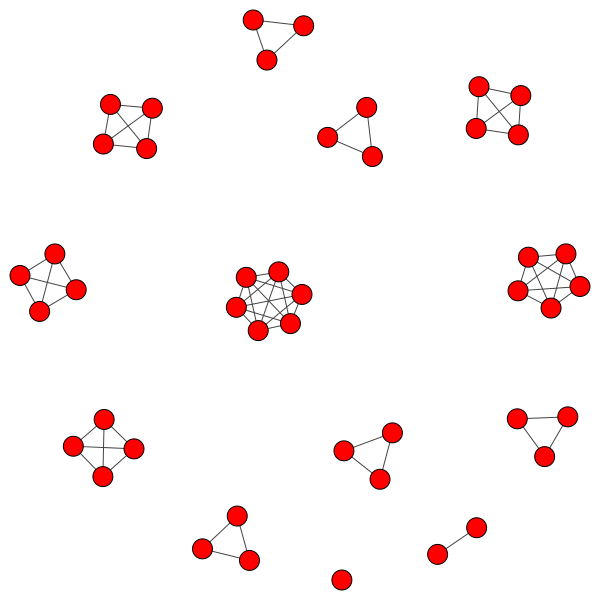

In [6]:
#create plot
ig.plot(bf_market_w)

Modification to Script 2-1

In [7]:
#define the metric between markets and construct the local Moran statistic with thresholding
#here, correlation coefficient
data=mydata.iloc[:,1:46]
weights_total=weights.iloc[:,1:46]
cor=np.corrcoef(data.transpose())
cor[cor>=0.9]=1
cor[cor<0.9]=0
cor_weighted=np.multiply(cor,weights_total)

In [8]:
#creat market graph and get rid of loops created from the correlation
bf_market_w=Graph.Adjacency(cor_weighted,mode="undirected")
edge_list=bf_market_w.get_edgelist()
self_loop=[]
for i in range(0,46):
    self=(i,i)
    self_loop.append(self)
to_remove=[]
for i in edge_list:
    for j in self_loop:
        if i==j:
            to_remove.append(i)
bf_market_w.delete_edges(to_remove)

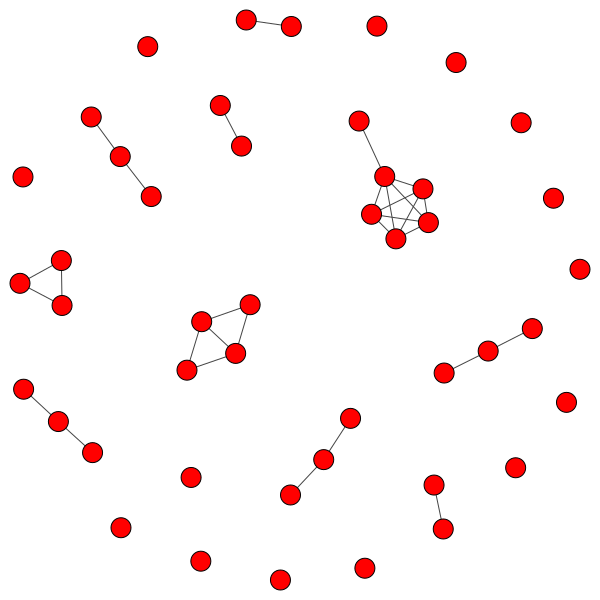

In [9]:
#create plot
ig.plot(bf_market_w)

Script 2-2: creating a social network in NetworkX

In [10]:
#import needed packages
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import math

In [18]:
#reading the dataset
fichier = pd.read_csv("/Users/franckm/Documents/draftcodefiles/AIMS_data.csv")
data = pd.DataFrame(fichier)
#data

In [12]:
#intializing the social network
aimsNetwork = nx.Graph()

#populating the network with nodes and edges
for i in range(len(data["Name"])) : 
    aimsNetwork.add_node(data["Name"][i], Age=data["Age"][i],country=data["Country"][i],   
    Field=data["Field"][i], background=data["Background"][i])
    for j in range(len(data["Name"])) :
        aimsNetwork.add_edge(data["Name"][j],data["Friend 1"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 2"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 3"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 4"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 5"][j])

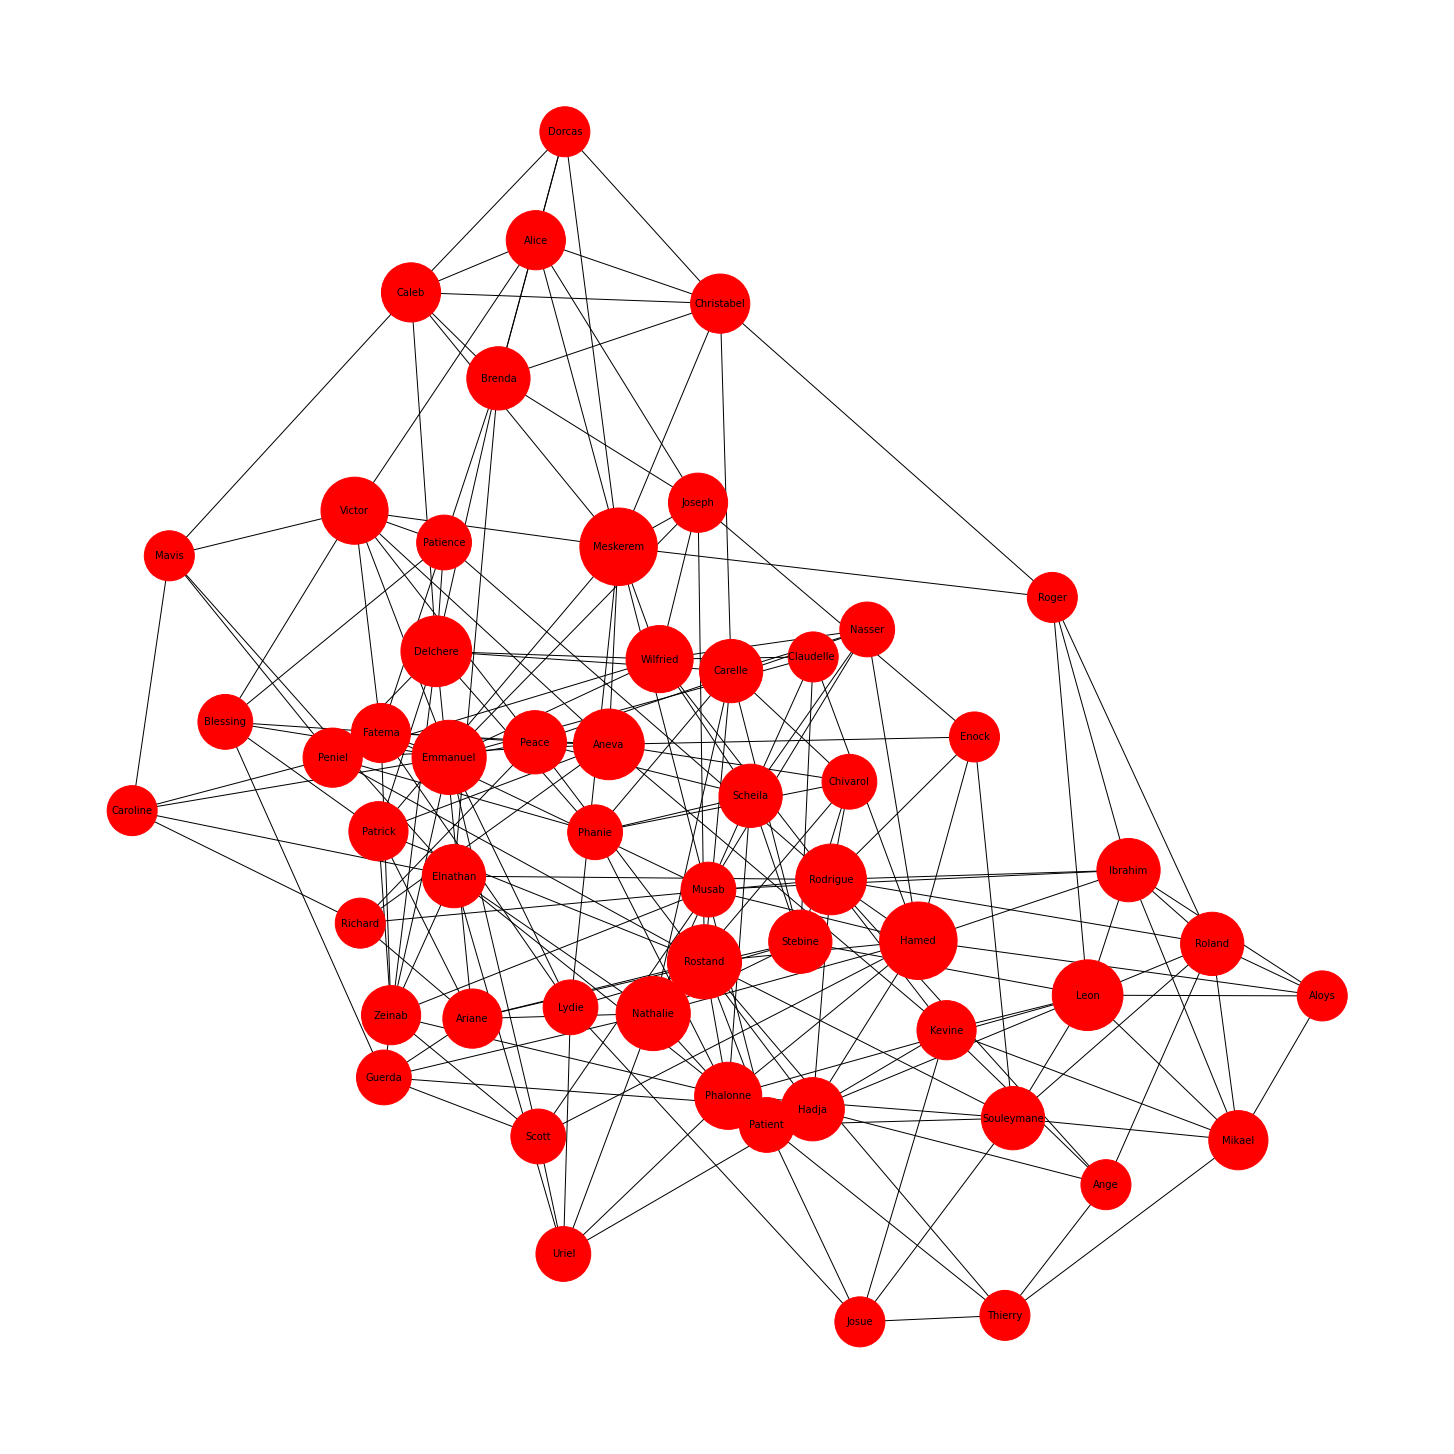

In [13]:
#plot AIMS student social network 
Degree=aimsNetwork.degree() 
var = [500*k[1] for k in list(Degree)]
plt.figure(figsize=(20,20))
nx.draw_spring(aimsNetwork, font_size=10, node_size = var, with_labels=True, node_color="red")
plt.show()